In [1]:
from dataLoader import importData
import numpy as np

In [3]:
%load_ext autoreload
%autoreload


trainFeat, trainGt, testFeat, testGt, _ = importData(4)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from sklearn.svm import OneClassSVM
from shellUtil import normIt
normalization = 0
if normalization == 0:
    trainFeat, m = normIt(trainFeat)
    testFeat,_  = normIt(testFeat, m)
elif normalization == 1:
    trainFeat = trainFeat/np.linalg.norm(trainFeat, axis=1, keepdims=True)
    testFeat = testFeat/np.linalg.norm(testFeat, axis=1, keepdims=True)
elif normalization == 2:
    print('raw features, do nothing')


In [26]:
%load_ext autoreload
%autoreload

import random
from stackedOneClassMean import evalOneClassMean_listOut
mask = np.zeros(trainGt.size, dtype=bool)
ind = random.sample(list(range(mask.size)), 10000)    
mask[ind] = 1
#mask[:] = 1
evalOneClassMean_listOut(testFeat, testGt, trainFeat[mask], trainGt[mask], verboise=True);


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Train Time:  0.02647801450075349
Test Time:  0.06258386649278691
Mean: 0.9852
MAP: 0.9994536595362165
AUROC: 0.99862248
ROC: [0.99847632 0.99876864]
TopX: [1000. 1000.]


In [53]:
step = int(trainGt.size/10)

s_trainTimes = []
s_testTimes = []
s_trainingSetSize = []

for i in range(100,  trainGt.size, step):
    mask = np.zeros(trainGt.size, dtype=bool)
    ind = random.sample(list(range(mask.size)), i)    
    mask[ind] = 1
    stat = evalOneClassMean_listOut(testFeat, testGt, trainFeat[mask], trainGt[mask], verboise=True);
    s_trainingSetSize.append(i)
    s_trainTimes.append(stat[3][0])
    s_testTimes.append(stat[3][1])


Train Time:  0.00043156000901944935
Test Time:  0.06187066149141174
Mean: 0.9818
MAP: 0.9994944007029991
AUROC: 0.99876312
ROC: [0.99896128 0.99856496]
TopX: [1000. 1000.]
Train Time:  0.005011114000808448
Test Time:  0.055703288002405316
Mean: 0.9848
MAP: 0.9994432247228416
AUROC: 0.9985696
ROC: [0.99839536 0.99874384]
TopX: [1000. 1000.]
Train Time:  0.011514422498294152
Test Time:  0.07181994199345354
Mean: 0.9846
MAP: 0.9994904567374996
AUROC: 0.9986240000000001
ROC: [0.99842256 0.99882544]
TopX: [1000. 1000.]
Train Time:  0.01500257701263763
Test Time:  0.05826946049637627
Mean: 0.9846
MAP: 0.9994993571923099
AUROC: 0.998652
ROC: [0.9985016 0.9988024]
TopX: [1000. 1000.]
Train Time:  0.02010587749828119
Test Time:  0.056482260013581254
Mean: 0.985
MAP: 0.9994613814090532
AUROC: 0.99863832
ROC: [0.9984568  0.99881984]
TopX: [1000. 1000.]
Train Time:  0.027172711997991428
Test Time:  0.06939655549649615
Mean: 0.985
MAP: 0.9994633608393463
AUROC: 0.99860536
ROC: [0.99844288 0.9987678

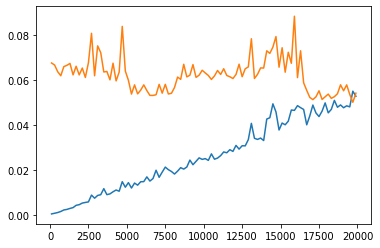

In [42]:
import matplotlib.pyplot as plt

plt.plot(np.array(trainingSetSize), np.array(s_trainTimes))
plt.plot(np.array(trainingSetSize), np.array(s_testTimes))

In [49]:
from stackedOneClassSVM import evalOneClassSVM_listOut

step = int(trainGt.size/10)

o_trainTimes = []
o_testTimes = []
o_trainingSetSize = []

for i in range(100,  trainGt.size, step):
    mask = np.zeros(trainGt.size, dtype=bool)
    ind = random.sample(list(range(mask.size)), i)    
    mask[ind] = 1
    stat = evalOneClassSVM_listOut(testFeat, testGt, trainFeat[mask], trainGt[mask], verboise=True);
    o_trainingSetSize.append(i)
    o_trainTimes.append(stat[3][0])
    o_testTimes.append(stat[3][1])


Train Time:  0.006088680514949374
Test Time:  0.2688270314974943
Mean: 0.5
MAP: 0.9975684466444776
AUROC: 0.99797544
ROC: [0.998224   0.99772688]
TopX: [1000. 1000.]
Train Time:  1.4839737149886787
Test Time:  4.65536441700533
Mean: 0.5
MAP: 0.9990329079162121
AUROC: 0.9989492799999999
ROC: [0.99895504 0.99894352]
TopX: [1000. 1000.]
Train Time:  5.744485112503753
Test Time:  9.434643205502653
Mean: 0.5
MAP: 0.9989863980474185
AUROC: 0.9989904000000001
ROC: [0.99895568 0.99902512]
TopX: [1000. 1000.]
Train Time:  12.464445226010866
Test Time:  13.72429413300415
Mean: 0.5
MAP: 0.9988877033018537
AUROC: 0.99890704
ROC: [0.99888112 0.99893296]
TopX: [1000. 1000.]
Train Time:  22.27408434750396
Test Time:  18.559586553979898
Mean: 0.5
MAP: 0.9989680225515868
AUROC: 0.99896512
ROC: [0.99892112 0.99900912]
TopX: [1000. 1000.]
Train Time:  33.9111466389877
Test Time:  23.587001096006134
Mean: 0.5
MAP: 0.9989833159617886
AUROC: 0.9989654400000001
ROC: [0.998908   0.99902288]
TopX: [1000. 1000.

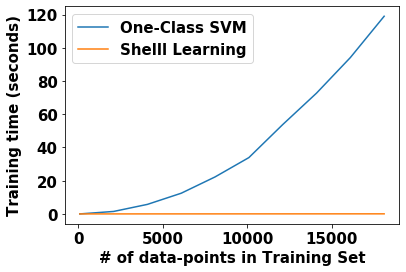

In [63]:
plt.plot(np.array(o_trainingSetSize), np.array(o_trainTimes))
plt.plot(np.array(o_trainingSetSize), np.array(s_trainTimes))
plt.legend(['One-Class SVM', 'Shelll Learning' ])
plt.xlabel('# of data-points in Training Set', weight='bold')
plt.ylabel('Training time (seconds)', weight='bold')
plt.savefig('trainTime.pdf',bbox_inches='tight')


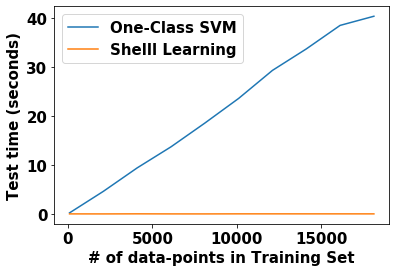

In [62]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["font.size"] = 15
plt.rcParams["axes.labelweight"] = "bold"


plt.plot(np.array(o_trainingSetSize), np.array(o_testTimes))
plt.plot(np.array(o_trainingSetSize), np.array(s_testTimes))

plt.legend(['One-Class SVM', 'Shelll Learning' ])
plt.xlabel('# of data-points in Training Set', weight='bold')
plt.ylabel('Test time (seconds)', weight='bold')
plt.savefig('testTime.pdf',bbox_inches='tight')
